## LDA (Latent Dirichlet Allocation)

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import gensim
import gensim.corpora as corpora

### Load Data

In [2]:
data = pd.read_csv("news_articles.csv")

In [3]:
data.head()

,title,content,date,fake_or_factual
0,New Study Claims Chocolate Cures Cancer,A groundbreaking study from an obscure lab cla...,15-Jan-24,Fake News
1,Scientists Discover New Species of Fish in Pac...,Marine biologists from NOAA announced the disc...,10-Feb-24,Factual News
2,Alien Fossils Found in Antarctica,A viral blog post claims researchers uncovered...,25-Mar-24,Fake News
3,New Solar Panel Design Boosts Efficiency by 30%,Engineers at MIT developed a solar panel with ...,5-Apr-24,Factual News
4,Tom Hanks Secretly Runs a Time Travel Agency,A conspiracy website claims Tom Hanks operates...,12-May-24,Fake News


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            52 non-null     object
 1   content          52 non-null     object
 2   date             52 non-null     object
 3   fake_or_factual  52 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


### Clean Data

In [5]:
articles = data['content'].str.lower().apply(lambda x: re.sub(r"([^\w\s])", "", x))

en_stopwords = stopwords.words('english')
articles = articles.apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))

articles = articles.apply(lambda x: word_tokenize(x))

ps = PorterStemmer()
articles = articles.apply(lambda tokens: [ps.stem(token) for token in tokens])

In [6]:
articles

0     [groundbreak, studi, obscur, lab, claim, eat, ...
1     [marin, biologist, noaa, announc, discoveri, n...
2     [viral, blog, post, claim, research, uncov, al...
3     [engin, mit, develop, solar, panel, novel, per...
4     [conspiraci, websit, claim, tom, hank, oper, c...
5     [studi, john, hopkin, univers, found, new, dru...
6     [selfproclaim, historian, claim, dinosaur, con...
7     [coral, restor, foundat, report, 40, increas, ...
8     [tabloid, claim, bigfoot, seen, wander, tokyo,...
9     [research, stanford, develop, lithiumion, batt...
10    [viral, x, post, insist, 1969, moon, land, fil...
11    [nasa, satellit, data, show, arctic, sea, ice,...
12    [gossip, site, claim, elvi, presley, fake, dea...
13    [team, eth, zurich, develop, aipow, prosthet, ...
14    [fring, websit, claim, ancient, mayan, tablet,...
15    [cdc, announc, new, flu, vaccin, reduc, sever,...
16    [sensat, news, outlet, report, haunt, toaster,...
17    [uk, complet, world, largest, offshor, win

### Vectorization

In [7]:
dictionary = corpora.Dictionary(articles)
print(dictionary)

Dictionary<644 unique tokens: ['back', 'bean', 'cancer', 'chocol', 'claim']...>


In [8]:
doc_term = [dictionary.doc2bow(text) for text in articles]

In [9]:
print(doc_term)

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1)], [(15, 1), (20, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)], [(4, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 2), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1)], [(55, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 3), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2)], [(4, 1), (24, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1)

### LDA

In [10]:
num_topics = 2

In [11]:
lda_model = gensim.models.LdaModel(corpus=doc_term, id2word=dictionary, num_topics=num_topics)

In [12]:
lda_model.print_topics(num_topics=num_topics, num_words=5)

[(0,
  '0.017*"claim" + 0.008*"2024" + 0.007*"report" + 0.007*"use" + 0.007*"research"'),
 (1,
  '0.013*"claim" + 0.008*"say" + 0.007*"publish" + 0.007*"energi" + 0.006*"use"')]

In [13]:
from gensim.models import LsiModel

In [14]:
lsa_model = LsiModel(corpus=doc_term, id2word=dictionary, num_topics=num_topics)

In [15]:
print(lsa_model.print_topics(num_topics=num_topics, num_words=5))

[(0, '0.570*"claim" + 0.260*"say" + 0.168*"evid" + 0.167*"studi" + 0.143*"show"'), (1, '-0.313*"publish" + -0.276*"energi" + -0.273*"use" + -0.205*"develop" + -0.195*"2024"')]


In [16]:
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

## Determin Number of Topics

In [17]:
coherence_values = []
model_list = []

In [18]:
min_topics = 2
max_topics = 11

In [19]:
for num_topics_i in range(min_topics, max_topics+1):
    model = LsiModel(doc_term, num_topics=num_topics_i, id2word = dictionary, random_seed=0)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=articles, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

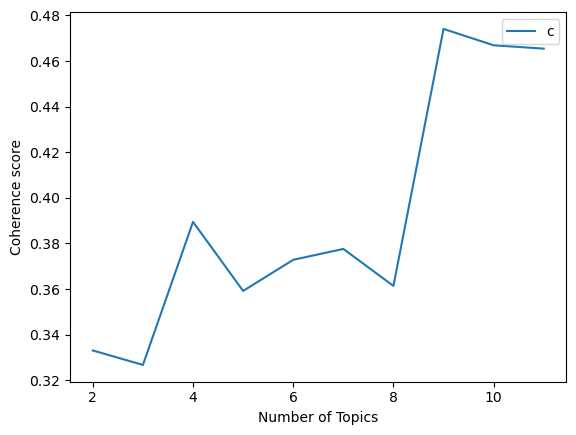

In [20]:
plt.plot(range(min_topics, max_topics+1), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [21]:
final_n_topics = 3
lsamodel_f = LsiModel(doc_term, num_topics=final_n_topics, id2word = dictionary) 
print(lsamodel_f.print_topics(num_topics=final_n_topics, num_words=5))

[(0, '0.570*"claim" + 0.260*"say" + 0.168*"evid" + 0.167*"studi" + 0.143*"show"'), (1, '0.313*"publish" + 0.276*"energi" + 0.273*"use" + 0.205*"develop" + 0.195*"2024"'), (2, '0.406*"studi" + -0.248*"say" + 0.213*"lab" + 0.213*"chocol" + -0.205*"expert"')]
